In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import*

In [6]:
df=pd.read_csv('C:\\Users\\naiki\\OneDrive\\Desktop\\Hexart\\preterm data.csv')
df

,Count Contraction,Length of Contraction,STD,Entropy,Contraction Times,Pre-term
0,12270,101751,31604.36766,1.510131,4,0
1,5860,240203,64681.25984,2.136096,1,0
2,10390,37306,53147.01634,2.413287,3,0
3,10191,226523,47544.61677,2.112573,2,0
4,10734,180987,59010.30642,2.373699,2,1
...,...,...,...,...,...,...
995,13554,219411,67669.02846,1.973921,4,0
996,7443,35963,56742.90587,2.216397,1,0
997,12783,111757,57146.79827,1.770943,1,1
998,5984,180515,44476.79963,1.702254,2,0


In [7]:
df.head()


,Count Contraction,Length of Contraction,STD,Entropy,Contraction Times,Pre-term
0,12270,101751,31604.36766,1.510131,4,0
1,5860,240203,64681.25984,2.136096,1,0
2,10390,37306,53147.01634,2.413287,3,0
3,10191,226523,47544.61677,2.112573,2,0
4,10734,180987,59010.30642,2.373699,2,1


In [8]:
df.tail()

,Count Contraction,Length of Contraction,STD,Entropy,Contraction Times,Pre-term
995,13554,219411,67669.02846,1.973921,4,0
996,7443,35963,56742.90587,2.216397,1,0
997,12783,111757,57146.79827,1.770943,1,1
998,5984,180515,44476.79963,1.702254,2,0
999,12790,109259,53746.43165,1.813827,2,1


In [9]:
df.describe()

,Count Contraction,Length of Contraction,STD,Entropy,Contraction Times,Pre-term
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,10018.431000,131351.004000,50021.296173,1.997367,2.544000,0.27600
std,2810.589711,68050.821244,11496.527363,0.287969,1.115934,0.44724
min,5004.000000,10126.000000,30062.604210,1.500012,1.000000,0.00000
25%,7629.250000,71677.000000,39973.528717,1.759179,2.000000,0.00000
50%,10166.500000,135069.000000,50432.880980,1.998218,3.000000,0.00000
75%,12344.750000,189073.000000,59629.055610,2.241986,4.000000,1.00000
max,14998.000000,249802.000000,69976.549030,2.497821,4.000000,1.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      1000 non-null   int64  
 1   Length of Contraction  1000 non-null   int64  
 2   STD                    1000 non-null   float64
 3   Entropy                1000 non-null   float64
 4   Contraction Times      1000 non-null   int64  
 5   Pre-term               1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [11]:
missing_data= df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0])*100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')
duplicate=df[df.duplicated()]
print("Duplicate rows:")
duplicate
df= df.drop_duplicates()

Total percentage of missing data is 0.0%
Duplicate rows:


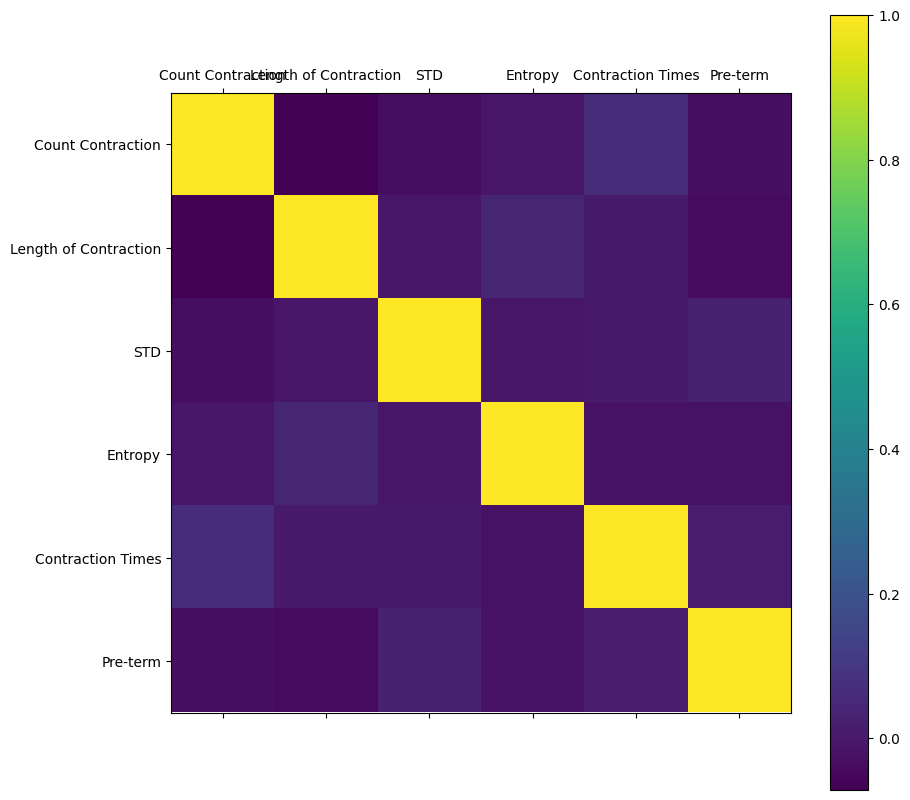

In [12]:
rcParams['figure.figsize']=10,10
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Count Contraction,Length of Contraction,STD,Entropy,Contraction Times,Pre-term
Count Contraction,1.000000,-0.071250,-0.031527,-0.007285,0.065823,-0.028527
Length of Contraction,-0.071250,1.000000,-0.007774,0.038100,0.007352,-0.038599
STD,-0.031527,-0.007774,1.000000,-0.008123,0.006907,0.028307
Entropy,-0.007285,0.038100,-0.008123,1.000000,-0.019223,-0.017326
Contraction Times,0.065823,0.007352,0.006907,-0.019223,1.000000,0.015756
Pre-term,-0.028527,-0.038599,0.028307,-0.017326,0.015756,1.000000


In [14]:
df.corr()

,Count Contraction,Length of Contraction,STD,Entropy,Contraction Times,Pre-term
Count Contraction,1.000000,-0.071250,-0.031527,-0.007285,0.065823,-0.028527
Length of Contraction,-0.071250,1.000000,-0.007774,0.038100,0.007352,-0.038599
STD,-0.031527,-0.007774,1.000000,-0.008123,0.006907,0.028307
Entropy,-0.007285,0.038100,-0.008123,1.000000,-0.019223,-0.017326
Contraction Times,0.065823,0.007352,0.006907,-0.019223,1.000000,0.015756
Pre-term,-0.028527,-0.038599,0.028307,-0.017326,0.015756,1.000000


In [15]:
corr = df.corr()

# Convert correlation values to percentages
corr_percent = corr * 100

# Display with a color gradient for better visualization
corr_percent.style.background_gradient(cmap='coolwarm').format("{:.1f}%")

,Count Contraction,Length of Contraction,STD,Entropy,Contraction Times,Pre-term
Count Contraction,100.0%,-7.1%,-3.2%,-0.7%,6.6%,-2.9%
Length of Contraction,-7.1%,100.0%,-0.8%,3.8%,0.7%,-3.9%
STD,-3.2%,-0.8%,100.0%,-0.8%,0.7%,2.8%
Entropy,-0.7%,3.8%,-0.8%,100.0%,-1.9%,-1.7%
Contraction Times,6.6%,0.7%,0.7%,-1.9%,100.0%,1.6%
Pre-term,-2.9%,-3.9%,2.8%,-1.7%,1.6%,100.0%


In [16]:
X = df.drop(['Pre-term'], axis = 1)
y = df['Pre-term']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,random_state= 0)
print("XTrain->",X_train.shape[0],"XTest->",X_test.shape[0], "YTrain->",y_train.shape[0], "YTest->",y_test.shape[0])

      

XTrain-> 700 XTest-> 300 YTrain-> 700 YTest-> 300


In [17]:
knn_scores = []
for k in range(2,21):
    from sklearn.neighbors import KNeighborsClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train.values, y_train.values)
    knn_score=round(knn_classifier.score(X_test.values, y_test.values),2)
    knn_scores.append(knn_score)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_score=knn_classifier.predict(X_test)
print(classification_report(y_test,knn_score))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       217
           1       0.27      0.11      0.16        83

    accuracy                           0.67       300
   macro avg       0.50      0.50      0.48       300
weighted avg       0.60      0.67      0.62       300



Text(0.5, 1.0, 'KNN Scores for different K neighbors')

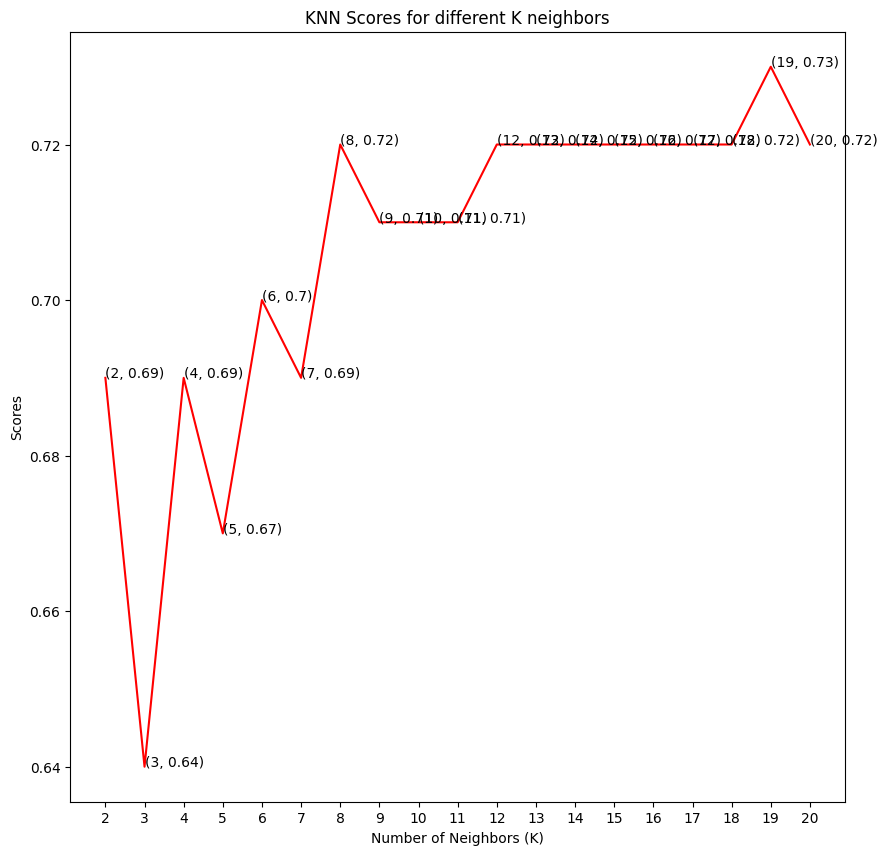

In [18]:
plt.plot([k for k in range(2,21)],knn_scores, color = 'red')
for i in range(2,21):
    plt.text(i,knn_scores[i-2], (i,knn_scores[i-2]))
plt.xticks([i for i in range(2,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('KNN Scores for different K neighbors')

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train.values, y_train.values)
    svc_scores.append(round(svc_classifier.score(X_test.values, y_test.values),2))

svc_classifier = SVC(kernel = kernels[0])
svc_classifier.fit(X_train.values, y_train.values)
svc_prediction_result=svc_classifier.predict(X_test.values)
print(accuracy_score(y_test.values,svc_prediction_result))
    

0.7133333333333334


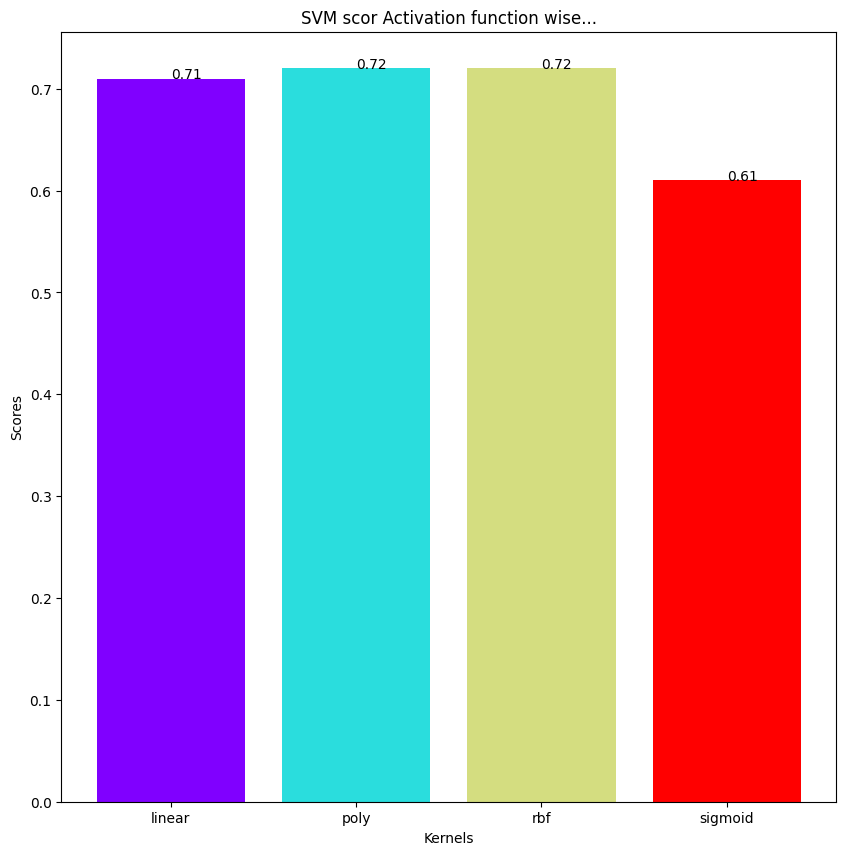

In [20]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
    plt.xlabel('Kernels')
    plt.ylabel('Scores')
    plt.title('SVM scor Activation function wise...')

In [21]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) +1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(X_test.values, y_test.values),2))
print("Done")

Done


In [22]:
print(dt_scores)

[0.6, 0.61, 0.59, 0.58, 0.55]


In [23]:
dt_classifier = DecisionTreeClassifier(max_features = 13, random_state = 0)
dt_classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

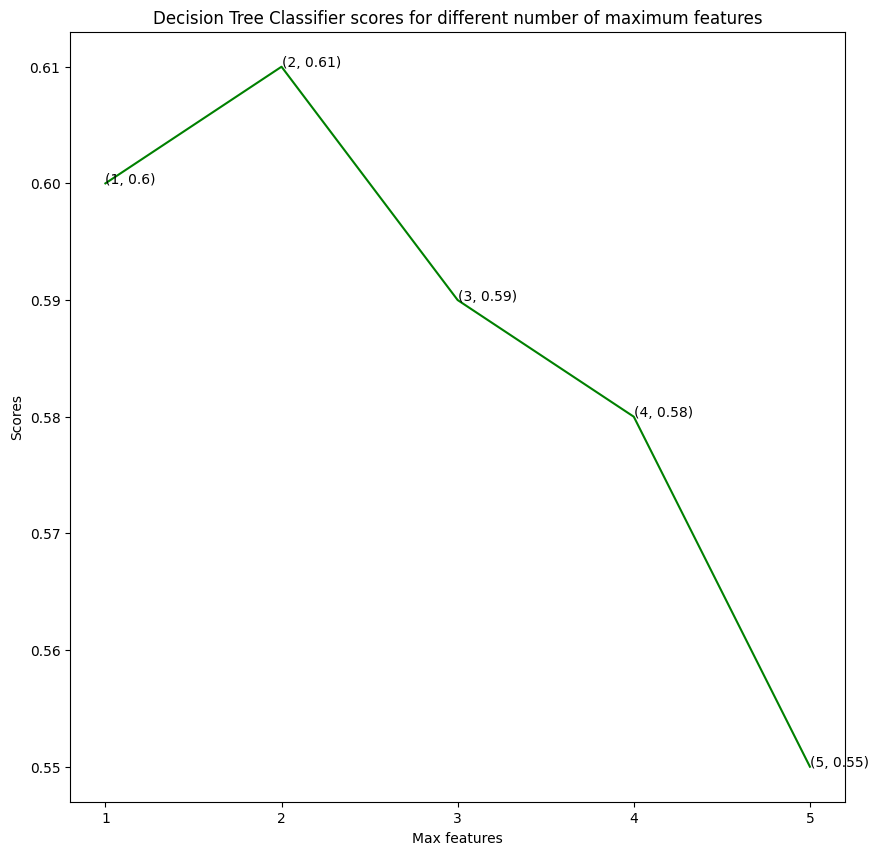

In [24]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) +1):
    plt.text(i, dt_scores[i-1], (i,dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [25]:
#Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train.values, y_train.values)
rf_scores = []
estimators = [10,20,100,200,500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state =0 )
    rf_classifier.fit(X_train.values, y_train.values)
    rf_scores.append(round(rf_classifier.score(X_test.values, y_test.values),2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

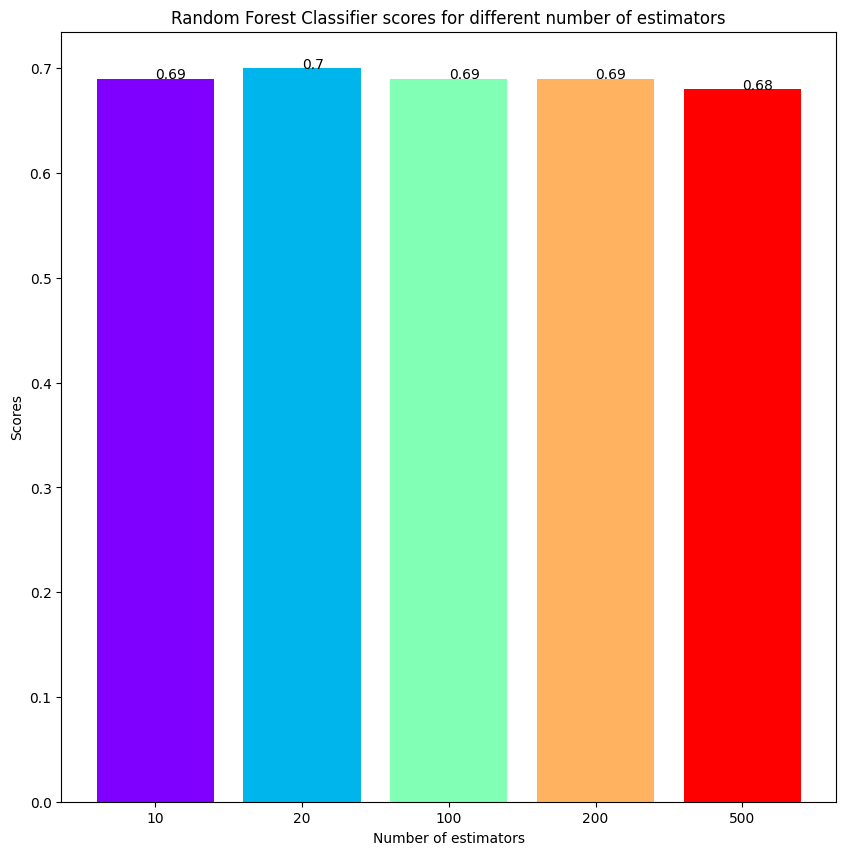

In [26]:
colors = rainbow(np.linspace(0,1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [27]:
#Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train.values, y_train.values)
logistic_model_prediction=logistic_model.predict(X_test.values)
print(accuracy_score(y_test.values,logistic_model_prediction))
print(classification_report(y_test.values,logistic_model_prediction))

<IPython.core.display.Javascript object>

0.7233333333333334
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       217
           1       0.00      0.00      0.00        83

    accuracy                           0.72       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.52      0.72      0.61       300



In [30]:
#Save Trained model
import pickle
all_models=[rf_model,logistic_model,dt_classifier,svc_classifier,knn_classifier]
#pikle.dump(logistic_model,open("models.pkl","wb"))
#pickle.dump(rf_classifier,open("models.pkl","wb"))
with open("models1.pkl", 'wb') as files:
    pickle.dump(all_models, files)
print("Done")

Done


In [31]:
open_file = open("models1.pkl", "rb")
loaded_list = pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[RandomForestClassifier(random_state=0), LogisticRegression(), DecisionTreeClassifier(max_features=13, random_state=0), SVC(kernel='linear'), KNeighborsClassifier()]
Done
